# 실습 내용

- 다양한 알고리즘으로 모델을 만들고 성능을 예측합니다.
- 성능이 좋을 것으로 판단된 모델의 성능을 튜닝합니다.
- 튜닝된 모델의 성능을 평가합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/mobile_cust_churn.csv'
data = pd.read_csv(path)
data['CHURN'] = data['CHURN'].map({'STAY':0, 'LEAVE': 1})

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

**데이터 설명**

- COLLEGE: 대학 졸업여부
- INCOME: 연수입
- OVERAGE: 월평균 초과사용 시간(분)
- LEFTOVER: 월평균 잔여시간비율(%)
- HOUSE: 집값
- HANDSET_PRICE: 스마트폰 가격
- OVER_15MINS_CALLS_PER_MONTH: 월평균 장기통화(15분이상) 횟수
- AVERAGE_CALL_DURATION: 평균 통화 시간
- REPORTED_SATISFACTION: 만족도 설문조사 결과
- REPORTED_USAGE_LEVEL: 사용도 자가진단 결과
- CONSIDERING_CHANGE_OF_PLAN: 향후 변경계획 설문조사 결과
- CHURN: 이탈(번호이동) 여부

In [3]:
# 데이터 살펴보기


In [4]:
# 기술통계 확인


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.
- 다음과 같은 전처리를 적절한 순서에 따라 진행합니다.
    - 불필요한 변수 제거
    - 필요한 변수 추가
    - 결측치 제거
    - x, y 분리
    - 가변수화
    - 학습용, 평가용 데이터 분리
    - 스케일링(정규화) 등

**1) 변수 제거**

In [5]:
# 제거 대상: id
drop = ['id']


data.drop(drop, axis= 1 , inplace = True)


# 변수 제거


# 확인


**2) x, y 분리**

In [6]:
# target 확인
target = 'CHURN'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]



**3) 가변수화**

In [7]:
# 가변수화 대상: REPORTED_SATISFACTION, REPORTED_USAGE_LEVEL, CONSIDERING_CHANGE_OF_PLAN

dumm_cols = [ 'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']

# 가변수화
x = pd.get_dummies(x, columns=dumm_cols, drop_first=True)

# 확인 = 문자타입이 있는지?
x.head()


,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,0,31953,0,6,313378,161,0,4,0,1,0,0,0,1,0,0,0,0,1,0
1,1,36147,0,13,800586,244,0,6,0,1,0,0,0,1,0,0,1,0,0,0
2,1,27273,230,0,305049,201,16,15,0,1,0,0,0,0,0,1,0,0,0,1
3,0,120070,38,33,788235,780,3,2,0,1,0,0,0,0,1,0,1,0,0,0
4,1,29215,208,85,224784,241,21,1,0,0,0,1,0,1,0,0,0,1,0,0


**4) 학습용, 평가용 데이터 분리**

In [8]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)  


**5) 정규화**

In [9]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

# 4.성능 예측

- 여러 알고리즘으로 모델을 만들고 K-Fold CV로 성능을 예측합니다.
- 다음과 같은 알고리즘 중에서 일부를 대상으로 합니다.
    - Linear Regression(회귀인 경우만)
    - KNN
    - Decision Tree
    - Logistic Regression(분류인 경우만)
    - SVM
    - Random Forest
    - XGBoost
    - LigntGBM 등
- 각 모델의 예측된 성능 정보를 수집해 마지막에 비교합니다.
- 우선 이후 사용할 함수를 모두 불러옵니다.

In [10]:
# xgboost 설치
# pip install xgboost

In [11]:
# lightgbm 설치
# pip install lightgbm

- 이후 사용할 함수를 모두 불러옵니다.

In [12]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import *

In [13]:
from sklearn.metrics import *

**1) KNN**

In [14]:
# 불러오기

# 불러오기
!pip install imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler

# Under Sampling
under_sample = RandomUnderSampler()
u_x_train, u_y_train = under_sample.fit_resample(x_train, y_train)

# 확인
print('전:', np.bincount(y_train))
print('후:', np.bincount(u_y_train))

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# 선언하기 
model = KNeighborsClassifier(n_neighbors=5)

# 검증하기
cv_score = cross_val_score(model, x_train_s, y_train,cv = 5, scoring = 'accuracy')

# 확인
print(cv_score)
print('평균:', cv_score.mean())

#성능정보 수집
result = {}
result['KNN'] = cv_score.mean()
print(result)

[0.58571429 0.60035714 0.57785714 0.60321429 0.59785714]
평균: 0.5930000000000001
{'KNN': 0.5930000000000001}


**2) Decision Tree**

In [15]:
# 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# 선언하기 
model = DecisionTreeClassifier()

# 검증하기
cv_score = cross_val_score(model, x_train, y_train,cv = 5, scoring = 'accuracy')

# 확인
print(cv_score)
print('평균:', cv_score.mean())

#성능정보 수집
result['Decistion Tree'] = cv_score.mean()
print(result)

[0.61642857 0.62285714 0.60642857 0.61142857 0.62821429]
평균: 0.6170714285714286
{'KNN': 0.5930000000000001, 'Decistion Tree': 0.6170714285714286}


**3) Logistic Regression**

In [16]:
# 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# 선언하기 
model = LogisticRegression()

# 검증하기
cv_score = cross_val_score(model, x_train, y_train,cv = 5, scoring = 'accuracy')

# 확인
print(cv_score)
print('평균:', cv_score.mean())

#성능정보 수집

result['Linear'] = cv_score.mean()
print(result)

[0.62714286 0.63714286 0.6225     0.6425     0.635     ]
평균: 0.6328571428571429
{'KNN': 0.5930000000000001, 'Decistion Tree': 0.6170714285714286, 'Linear': 0.6328571428571429}


**4) SVM**

In [17]:
# 불러오기
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# 선언하기 
model = SVC()

# 검증하기
cv_score = cross_val_score(model, x_train_s, y_train, cv = 5,scoring = 'accuracy')

# 확인
print(cv_score)
print('평균:', cv_score.mean())

#성능정보 수집
result['SVM'] = cv_score.mean()
print(result)

[0.65607143 0.66357143 0.64321429 0.66642857 0.6575    ]
평균: 0.6573571428571429
{'KNN': 0.5930000000000001, 'Decistion Tree': 0.6170714285714286, 'Linear': 0.6328571428571429, 'SVM': 0.6573571428571429}


**5) Random Forest**

In [18]:
# 선언하기
model = RandomForestClassifier(max_depth=5, random_state =1)

cv_score = cross_val_score(model, x_train, y_train,cv = 5, scoring = 'accuracy')

# 확인
print(cv_score)
print('평균:', cv_score.mean())

#성능정보 수집

result['Random Forest'] = cv_score.mean()
print(result)


[0.68964286 0.70535714 0.68607143 0.69642857 0.69857143]
평균: 0.6952142857142857
{'KNN': 0.5930000000000001, 'Decistion Tree': 0.6170714285714286, 'Linear': 0.6328571428571429, 'SVM': 0.6573571428571429, 'Random Forest': 0.6952142857142857}


**6) XGBoost**

In [19]:
# 선언하기
model = XGBClassifier(max_depth = 5, random_state=1)

cv_score = cross_val_score(model, x_train, y_train,cv = 5, scoring = 'accuracy')

# 확인
print(cv_score)
print('평균:', cv_score.mean())


result['XGBoost'] = cv_score.mean()
print(result)

[0.69178571 0.69535714 0.68285714 0.69428571 0.69357143]
평균: 0.6915714285714286
{'KNN': 0.5930000000000001, 'Decistion Tree': 0.6170714285714286, 'Linear': 0.6328571428571429, 'SVM': 0.6573571428571429, 'Random Forest': 0.6952142857142857, 'XGBoost': 0.6915714285714286}


**7) LightGBM**

In [20]:
# 선언하기
model = LGBMClassifier(max_depth = 5, random_state=1)

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

result['LightGBM'] = accuracy_score(y_test, y_pred)
print(result)

[[1940 1125]
 [ 728 2207]]
              precision    recall  f1-score   support

           0       0.73      0.63      0.68      3065
           1       0.66      0.75      0.70      2935

    accuracy                           0.69      6000
   macro avg       0.69      0.69      0.69      6000
weighted avg       0.70      0.69      0.69      6000

{'KNN': 0.5930000000000001, 'Decistion Tree': 0.6170714285714286, 'Linear': 0.6328571428571429, 'SVM': 0.6573571428571429, 'Random Forest': 0.6952142857142857, 'XGBoost': 0.6915714285714286, 'LightGBM': 0.6911666666666667}


# 5.성능 비교

- 수집한 모델들의 성능 정보를 비교해  어떤 모델을 사용할 지 결정합니다.

In [21]:
# 성능 비교
result

{'KNN': 0.5930000000000001,
 'Decistion Tree': 0.6170714285714286,
 'Linear': 0.6328571428571429,
 'SVM': 0.6573571428571429,
 'Random Forest': 0.6952142857142857,
 'XGBoost': 0.6915714285714286,
 'LightGBM': 0.6911666666666667}

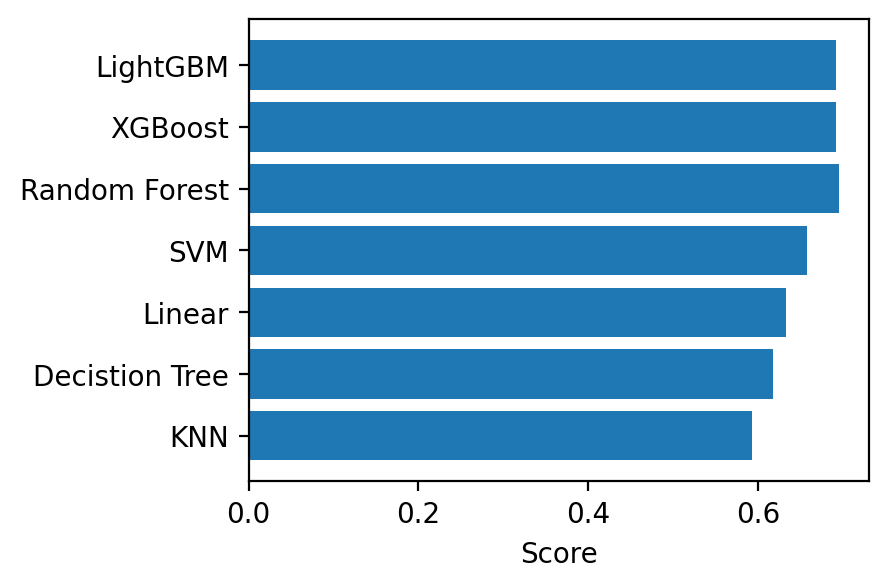

In [22]:
# 성능 시각화 비교
plt.figure(figsize=(4,3))
plt.barh(list(result), width = result.values())
plt.xlabel('Model')
plt.xlabel('Score')
plt.show()

# 6.성능 튜닝

- 위에서 성능이 가장 좋을 것으로 예측된 모델을 튜닝합니다.
- 본 실습에서는 LightGBM 모델 성능을 튜닝합니다.

In [23]:
# 기본 모델 선언
model_dt = LGBMClassifier(random_state=1)
# 파라미터 지정
  # max_depth: range(1, 21)

param = {'max_depth':range(1,21)}

# Random Search 선언

# 모델 선언

model = GridSearchCV(model_dt,  # 기본모델
                           param,     # 매개변수 범위를 가지고 있는 딕셔너리 변수
                           cv = 5,    # K-fold cv 분할 개수
                           scoring = 'accuracy')

In [24]:
# 학습하기(많은 시간이 소요될 수 있음)
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=1),
             param_grid={'max_depth': range(1, 21)}, scoring='accuracy')

In [25]:
# 최적 파라미터, 예측 최고 성능
# 중요 정보 확인
print('=' * 80)
print(model.cv_results_['mean_test_score'])
print('-' * 80)
print('최적파라미터:', model.best_params_)
print('-' * 80)
print('최고성능:', model.best_score_)
print('=' * 80)

[0.67542857 0.69257143 0.69528571 0.6955     0.69585714 0.698
 0.69635714 0.69664286 0.69671429 0.69635714 0.69621429 0.69421429
 0.69528571 0.69392857 0.69642857 0.69785714 0.69621429 0.69621429
 0.69621429 0.69621429]
--------------------------------------------------------------------------------
최적파라미터: {'max_depth': 6}
--------------------------------------------------------------------------------
최고성능: 0.6980000000000001


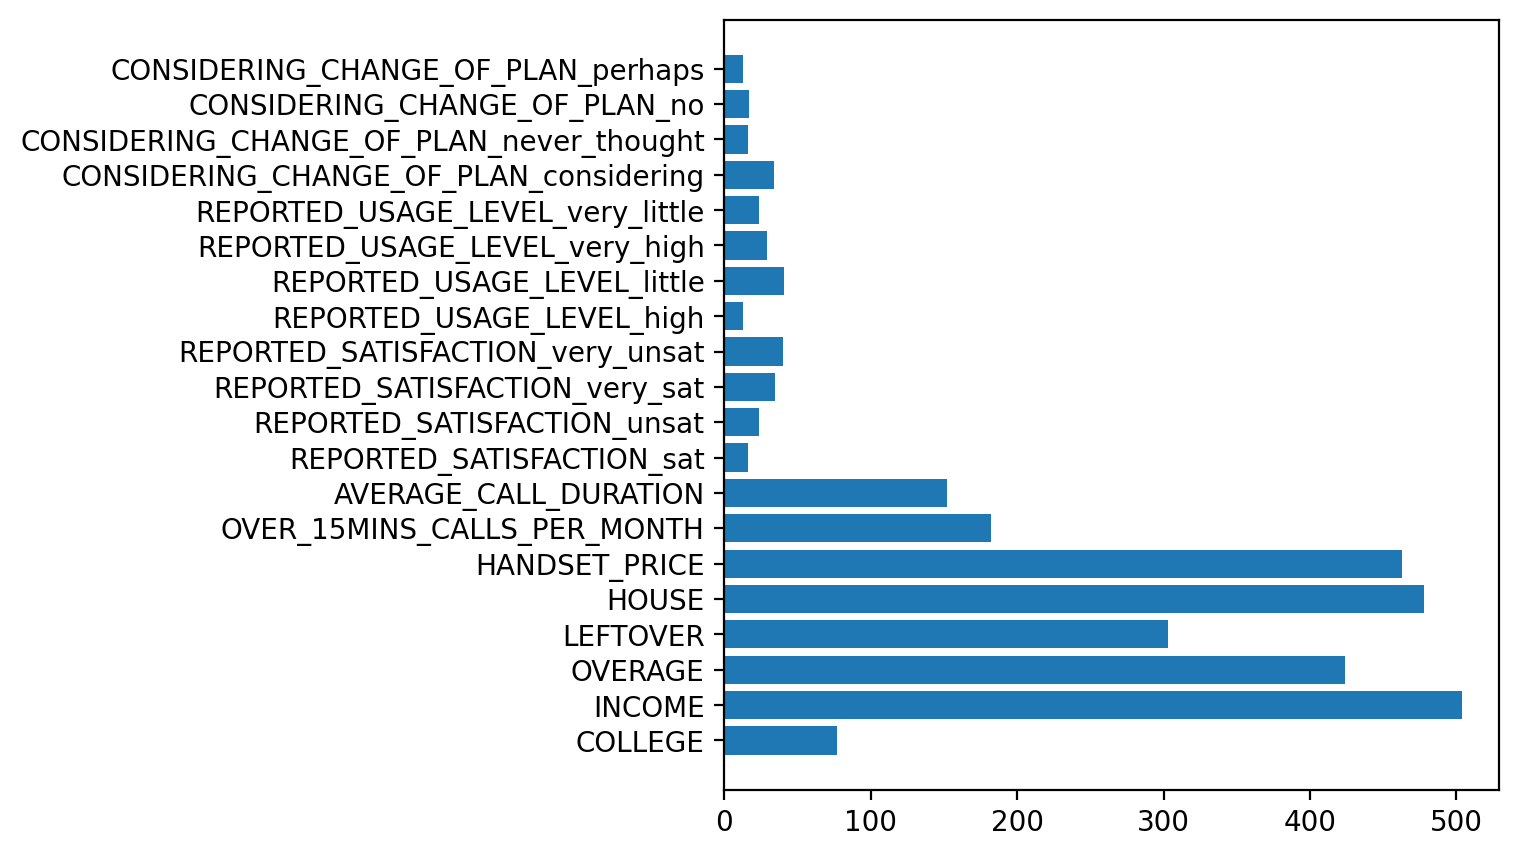

In [26]:
# 변수 중요도
plt.figure(figsize=(5, 5))
plt.barh(y=list(x), width=model.best_estimator_.feature_importances_)
plt.show()

# 7.성능 평가

- 최적 파라미터로 학습된 모델에 대해 최종 성능 평가를 진행합니다.

In [27]:
# 예측하기
y_pred = model.predict(x_test)

In [28]:
# 성능평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1953 1112]
 [ 747 2188]]
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      3065
           1       0.66      0.75      0.70      2935

    accuracy                           0.69      6000
   macro avg       0.69      0.69      0.69      6000
weighted avg       0.69      0.69      0.69      6000



In [63]:
accuracy_score(y_test, y_pred)

0.6883333333333334